<a href="https://colab.research.google.com/github/emichester/08MIAR_Aprendizaje_por_Refuerzo/blob/main/SesionesPracticas/Sesion_2/08MIAR_actor_critic_clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> En la presente sesión, se va a desarrollar la **implementación**  algoritmos avandos dentro de la familia de **Policy Gradients (PG)** En concreto, se va a implementar la variabte **Asyncronous Advantadge Actor-Critic (A3C)**. Esta versión incorpora ciertos avances con respecto al algoritmo PG, como son el uso de la función de ventaja como ponderación de los gradientes, su estimación mediante una función Critic, y exploración multiproceso asíncrona. La implementación será realizada utilizando la librería **pytorch**. Finalmente, se realizarán visualizaciones de KPIs del proceso de entrenamiento, con tal de analizar su convergencia.





---
## **PARTE 1** - Instalación y requisitos previos

> Las prácticas han sido preparadas para poder realizarse en el entorno de trabajo de Google Colab. Sin embargo, esta plataforma presenta ciertas incompatibilidades a la hora de visualizar la renderización en gym. Por ello, para obtener estas visualizaciones, se deberá trasladar el entorno de trabajo a local. Por ello, el presente dosier presenta instrucciones para poder trabajar en ambos entornos. Siga los siguientes pasos para un correcto funcionamiento:
1.   **LOCAL:** Preparar el enviroment, siguiendo las intrucciones detalladas en la sección *1.1.Preparar enviroment*.
2.  **AMBOS:** Modificar las variables "mount" y "drive_mount" a la carpeta de trabajo en drive en el caso de estar en Colab, y ejecturar la celda *1.2.Localizar entorno de trabajo*.
3. **COLAB:** se deberá ejecutar las celdas correspondientes al montaje de la carpeta de trabajo en Drive. Esta corresponde a la sección *1.3.Montar carpeta de datos local*.
4.  **AMBOS:** Instalar las librerías necesarias, siguiendo la sección *1.4.Instalar librerías necesarias*.



---
### 1.1. Preparar enviroment (solo local)



> Para preparar el entorno de trabajo en local, se han seguido los siguientes pasos:
1. En Windows, puede ser necesario instalar las C++ Build Tools. Para ello, siga los siguientes pasos: https://towardsdatascience.com/how-to-install-openai-gym-in-a-windows-environment-338969e24d30.
2. Instalar Anaconda
3. Siguiendo el código que se presenta comentado en la próxima celda: Crear un enviroment, cambiar la ruta de trabajo, e instalar librerías básicas.


```
conda update --all
conda create --name miar_rl python=3.8
conda activate miar_rl
cd "PATH_TO_FOLDER"
conda install git
pip install jupyter
```


4. Abrir la notebook con *jupyter-notebook*.



```
jupyter-notebook
```




---
### 1.2. Localizar entorno de trabajo: Google colab o local

In [1]:
import os
# ATENCIÓN!! Modificar ruta relativa a la práctica si es distinta (drive_root)
mount='/content/drive'
drive_root = os.path.join(mount, "MyDrive/ASIGNATURAS/VIU/08MIAR_Aprendizaje_por_Refuerzo")

try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

---
### 1.3. Montar carpeta de datos local (solo Colab)

In [2]:
# Switch to the directory on the Google Drive that you want to use
import os
if IN_COLAB:
  print("We're running Colab")

  if IN_COLAB:
    # Mount the Google Drive at mount
    print("Colab: mounting Google drive on ", mount)

    drive.mount(mount)

    # Create drive_root if it doesn't exist
    create_drive_root = True
    if create_drive_root:
      print("\nColab: making sure ", drive_root, " exists.")
      os.makedirs(drive_root, exist_ok=True)

    # Change to the directory
    print("\nColab: Changing directory to ", drive_root)
    %cd $drive_root
# Verify we're in the correct working directory
%pwd
print("Archivos en el directorio: ")
print(os.listdir())

We're running Colab
Colab: mounting Google drive on  /content/drive
Mounted at /content/drive

Colab: making sure  /content/drive/MyDrive/ASIGNATURAS/VIU/08MIAR_Aprendizaje_por_Refuerzo  exists.

Colab: Changing directory to  /content/drive/MyDrive/ASIGNATURAS/VIU/08MIAR_Aprendizaje_por_Refuerzo
/content/drive/MyDrive/ASIGNATURAS/VIU/08MIAR_Aprendizaje_por_Refuerzo
Archivos en el directorio: 
['breakout_ac.pth']


---
### 1.4. Instalar librerías necesarias


In [3]:
if IN_COLAB:
  %pip install gym==0.17.3
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install keras-rl2==1.0.5
  %pip install tensorflow==2.8
else:
  %pip install gym==0.17.3
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install pyglet==1.5.0
  %pip install h5py==3.1.0
  %pip install Pillow==9.5.0
  %pip install keras-rl2==1.0.5
  %pip install Keras==2.2.4
  %pip install tensorflow==2.5.3
  %pip install torch==2.0.1
  %pip install agents==1.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.0 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.17.3-py3-none-any.whl size=1654618 sha256=6365815172e79b44358e720f94443b5b4f2a4f5069375511aafdabd0a5d70960
  Stored in directory: /root/.cache/pip/wheels/af/4b/74/fcfc8238472c34d7f96508a63c962ff3ac9485a9a4137afd4e
Successfully built gym
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 2.2.1
    Uninstalling cloudpickle-2.2.1:
      Successfully uninstalled cloudpickle-2.2.1
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.13.0 requires cloudpick

---
### 1.5.Acerca de las librerías para RL

Librería para trabajar con nuestros entornos: gym (https://gym.openai.com/) \
Librería para trabajar con deep learning: tensorflow (https://www.tensorflow.org/) \
Librería para desarrollar soluciones de RL a alto nivel: keras-rl (https://github.com/keras-rl/keras-rl) \


---
## **PARTE 1** - *Actor-Critic*


---
### 2.1. PG A3C Pseudo-código

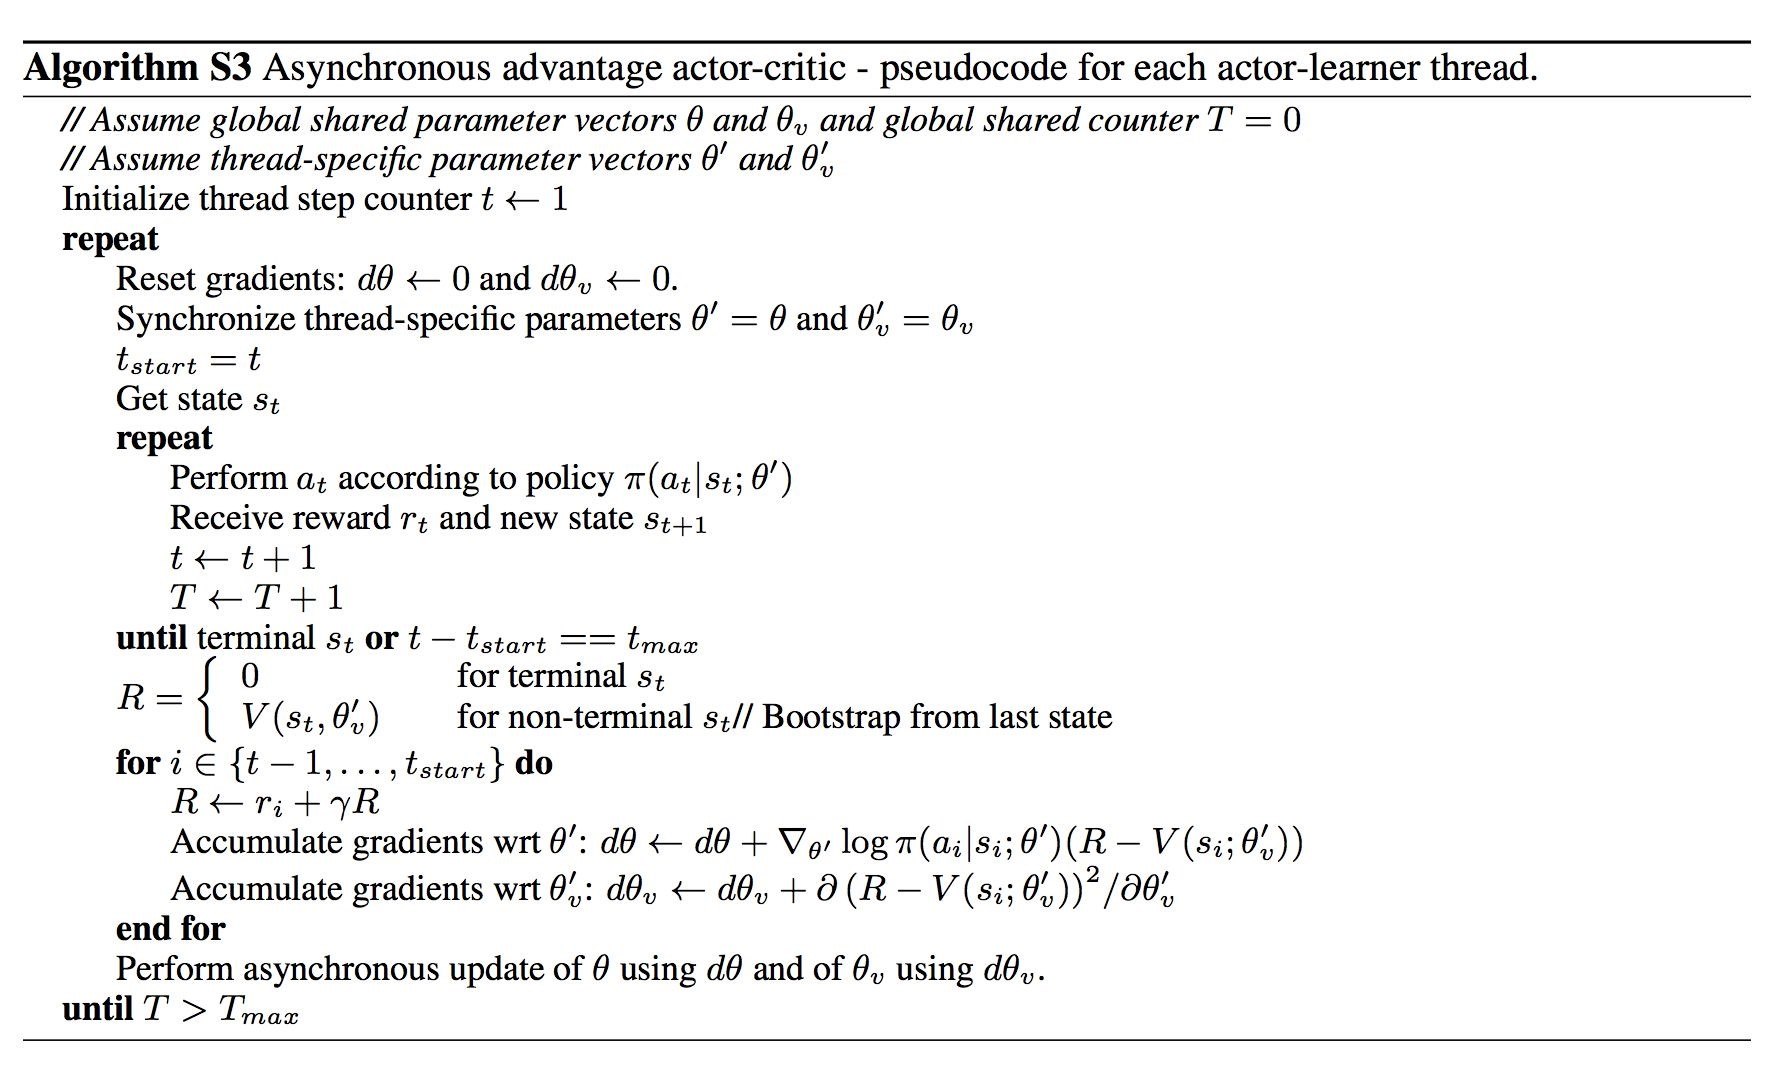

In [ ]:
from IPython import display
display.Image("images/a3c.jpg", width = 600, height = 300)

---
### 3.2. Ejemplo de *Actor-Critic* con *Pytorch* (PG)

Equivalente al algoritmo anterior, pero sin multi-proceso.

Información del entorno: https://www.gymlibrary.dev/environments/atari/breakout/

Basado en: https://github.com/keras-rl/keras-rl/blob/master/examples/dqn_atari.py

In [4]:
# Imports
import math
import os
import sys
import time

import numpy as np
import gym
import torch
import torch.multiprocessing as mp
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from PIL import Image
from torch.autograd import Variable

In [5]:
# variables
model_path = "breakout_ac.pth"
env_name = "BreakoutDeterministic-v4"


# Hyperparámetros
# Entrenamiento
EPISODIOS_TRAINING = 5000
EPISODIOS_TESTING = 10
GAMMA = 0.99 # discount rewards
T = 224 # número máximo de iteraciones (steps)
ALPHA_VALUE = 0.5
# PPO
EPOCHS = 10
EPSILON_CLIP = 0.1

# Preprocesado observación-estado
HEIGHT, WIDTH = 84, 84
N_FRAMES = 4 # frames que necesitamos para calcular velocidad y aceleración de los componentes

In [6]:
# Definimos la arquitectura del knowledge (CNN)

# Normalmente dos modelos:
# Actor
# Critic

# En este caso, para no consumir tantos recursos vamos a hacer una solución
# híbrida donde el Actor y el Critic van a compartir el botleneck
class ActorCritic(nn.Module):
    def __init__(self): # generalizar-> def __init__(self, number_of_action, ...)
        # llamamos al init de la clase de la que heredamos
        super(ActorCritic, self).__init__()

        # Definimos las capas de la red neuronal, en Pytorch no hace falta pasar
        # las dimensiones de la entrada (height, width)
        # 1) Base Model
        self.conv1 = nn.Conv2d(4, 32, 8, stride=4)
        self.conv2 = nn.Conv2d(32, 64, 4, stride=2)
        self.conv3 = nn.Conv2d(64, 64, 3, stride=1)

        # 2) Proyección intermedia (Asumimos que hemos hecho el Flatten)
        # más generalizable, se puede sustituir el Flatten por un global average pooling
        # donde toda la información espacial la resumiría en un único valor
        # en este caso no sabemos si funcionará tan bien porque puede que la
        # localización de los píxeles en la imagen puede ser importante
        # la salida del GlobalAveragePooling y entrada al nn.Linear sería 1*1*64
        self.fc1 = nn.Linear(7*7*64, 512) # 84x84 termina en 7x7 por los strides

        # 3) Salida híbrida
        self.actor = nn.Linear(512, 4) # numero de acciones
        self.critic = nn.Linear(512, 1) # linear output del value

    def forward(self, x):
        # 1) Forward base model
        x = torch.nn.functional.relu(self.conv1(x))
        x = torch.nn.functional.relu(self.conv2(x))
        x = torch.nn.functional.relu(self.conv3(x))

        # 2) Flatten + Projection
        x = x.view(-1, 7*7*64) # reshape, 84x84 termina en 7x7 por los strides
        x = torch.nn.functional.relu(self.fc1(x))

        # 3) Salida híbrida
        policy = self.actor(x) # Aplicaremos softmax más adelante, por ahora nos quedamos con los logits
        value = self.critic(x)

        return policy, value

In [7]:
# Preprocesado, funciones

# Pasar de RGB a gray y reescalado
def rgb2gray_and_resize(screen, height, width):
    #RGB a gris
    screen_gray = np.array(np.dot(screen[...,:3], [0.299, 0.587, 0.114]), dtype=np.uint8)
    # Ej. pixel (1,1) = [10,20,30] -> gray = 10*0.299 + 20*0.587 + 30*0.114
    img_from_array = Image.fromarray(screen_gray)

    # reescalado de imagen
    img_from_array = img_from_array.resize((height, width))

    return np.array(img_from_array)


# Concatenar secuencias (window_length)
def update_frame_sequence(state, obs, n_frames= 4, height=84, width=84):
    # Paso a nivel de gris, reescalado y estandarización
    obs = np.ascontiguousarray(rgb2gray_and_resize(obs, height, width), dtype=np.float32) / 255
    # ya es un estado
    obs = torch.FloatTensor(obs)

    # incorporar al buffer
    if state is None: # Inicio, no tenemos ventanas previas
        # repetimos la observación 4 veces
        _state = obs.repeat(n_frames, 1).view(n_frames, width, height)
    else: # Tenemos ventanas previas, incorporamos una nueva
        _state = state.view(n_frames, width, height)
        # descartamos la primera ventana "_state[1:]" y concatenamos la nueva
        _state = torch.cat((_state[1:], obs.view(1, width, height)))

    return _state

# Estandarizar recompensas (CLIP)
def calculate_reward(reward):
    reward = np.clip(1, -1, reward)
    return reward

#### CPU

In [18]:
# Entrenamiento de agente Actor-Critic
# semilla
torch.manual_seed(22) # reproducibilidad

# instanciamos un entorno y modelo para el proceso
env = gym.make(env_name) # entorno
model = ActorCritic()
model.train() # lo ponemos en modo entrenamiento, para habilitar el dropout y demás, para deshabilitarlos: model.eval() -> fase de test

# Preparar optimizador
optimizer = optim.Adam(model.parameters(), lr=0.00025) # se le pasan los parámetros de la red

# Inicializamos primera trayectoria
obs = env.reset()
state = None # inicio
state = update_frame_sequence(state=state,obs=obs,n_frames=N_FRAMES, height=HEIGHT, width=WIDTH)

# Primer bucle: episodios de entrenamiento
for i_episode in range(int(EPISODIOS_TRAINING)):
    done = False
    # Preparamos el buffer de memoria -> on-policy, si fuera off-policy la inicialización sería antes del bucle
    values, log_probs, rewards = [], [], []

    # Segundo bucle: recopilamos la trayectoria
    # A. Recopilar trayectoria
    for step in range(int(T)):
        # recopilamos la trayectoria
        # Forward de actor-critic dado el estado actual
        logits, value = model(state.unsqueeze(0)) # necesitamos tener la dimensión del batch size, por eso el unsqueeze

        # Obtenemos probabilidad de acción -> softmax
        prob = torch.nn.functional.softmax(logits, -1) # ej. [0,0.2,0.6,0.2]
        # Obtenemos el logaritmo de la policy (para optimizar el actor luego)
        log_prob = torch.nn.functional.log_softmax(logits, -1) # ej. log([0,0.2,0.6,0.2])

        # Obtener la acción a realizar, mediante un sampleo en vez de un argmax (Policy Gradient), queremos explorar más
        action = prob.multinomial(num_samples=1) # 2
        log_prob = log_prob.gather(1, Variable(action)) # ej. log(0.6)

        # Con la acción seleccionada, realizamos un step en el entorno
        obs, reward, done, info = env.step(action.item()) # .item() de un tensor a un escalar
        reward = calculate_reward(reward)

        # Actualizamos el estado con la siguiente observación
        state = update_frame_sequence(state=state,obs=obs,n_frames=N_FRAMES, height=HEIGHT, width=WIDTH)

        # Almacenamos información en memoria
        values.append(value)
        log_probs.append(log_prob)
        rewards.append(reward)

        if done:
            env.reset()
            state = None
            state = update_frame_sequence(state=state,obs=obs,n_frames=N_FRAMES, height=HEIGHT, width=WIDTH)
            break

    # B. Preparar la información para la actualización de actor y critic
    # B.1) Recompensa en estado final
    R = torch.zeros(1, 1)
    # R = torch.tensor(1)
    if not done:
        _, value = model(state.unsqueeze(0)) # s -> s'
        R = value.data
    values.append(Variable(R))

    # B.2) Computar los discount rewards -> aprovechando la recursividad
    discount_rewards = rewards.copy() # inicialización
    for i in reversed(range(len(rewards))): # bucle reverso
        # Obtenemos los discount rewards para cada t
        R = rewards[i] + GAMMA * R
        discount_rewards[i] = R

    # C. Optimización de Actor y Critic, dada la/las trayectoria/s
    policy_loss, value_loss = 0, 0
    for i in range(len(rewards)): # bucle en toda la trayectoria acumulando gradientes
        # C.1) Calcular advantage como factor de relevancia
        advantage = discount_rewards[i] - values[i]

        # C.2) obtener criterio del critic
        value_loss = value_loss + advantage.pow(2)

        # C.3) Policy gradientes ponderado por advantage - actor
        # para el actor simplemente queremos que el advantage sea un factor de
        # ponderación o de relevancia, no queremos se backpropague con esto,
        # por ello lo de Variable(advantage), para cortar el enlace (el advantage
        # viene del valor de predicción del values que a su vez usamos para
        # calcular el value_loss) y no queremos que se nos mezclen los gradientes
        # del critic con los del actor
        policy_loss = policy_loss - (log_probs[i] * Variable(advantage))

    # Limpiamos información del modelo (que no queden gradientes de la anterior
    # actualización)
    optimizer.zero_grad()

    # Calculamos la función de pérdidas combinada
    # disminuímos la importancia del término del value porque queremos que la
    # policy converja más rápido (ponderamos con un valor alpha)
    loss_fc = (policy_loss + ALPHA_VALUE * value_loss)

    # Computar los gradientes respecto a función de pérdidas combinadas
    loss_fc.backward(retain_graph=True) # actualiza todo lo que tenga hacia atrás

    # Step en pesos -> actualizar el ActorCritic
    optimizer.step()

    # Printear evolución
    print("Trayectoria: ", int(i_episode)+1, "/", int(EPISODIOS_TRAINING))
    print("Numero de steps en la trayectoria: ", len(rewards), ", Recompensa total del episodio: ", np.sum(rewards), ", Value promedio por step: ", str(np.mean([iValue.detach().numpy() for iValue in values])))

    # Guardar los pesos del modelo
    torch.save(model.state_dict(), model_path)

Trayectoria:  1 / 5000
Numero de steps en la trayectoria:  202 , Recompensa total del episodio:  2.0 , Value promedio por step:  [[0.00086619]]
Trayectoria:  2 / 5000
Numero de steps en la trayectoria:  139 , Recompensa total del episodio:  0.0 , Value promedio por step:  [[0.0827437]]
Trayectoria:  3 / 5000
Numero de steps en la trayectoria:  136 , Recompensa total del episodio:  0.0 , Value promedio por step:  [[0.14112978]]
Trayectoria:  4 / 5000
Numero de steps en la trayectoria:  180 , Recompensa total del episodio:  1.0 , Value promedio por step:  [[0.20129482]]
Trayectoria:  5 / 5000
Numero de steps en la trayectoria:  208 , Recompensa total del episodio:  2.0 , Value promedio por step:  [[0.27733785]]
Trayectoria:  6 / 5000
Numero de steps en la trayectoria:  141 , Recompensa total del episodio:  0.0 , Value promedio por step:  [[0.3790542]]
Trayectoria:  7 / 5000
Numero de steps en la trayectoria:  140 , Recompensa total del episodio:  0.0 , Value promedio por step:  [[0.49585

KeyboardInterrupt: ignored

#### GPU

```Python
model = ActorCritic().cuda()
...
logits, value = model(state.unsqueeze(0).cuda())
...
advantage = discount_rewards[i].cuda() - values[i]
...
... [ iValue.detach().cpu().numpy() ...]
```

In [11]:
# Entrenamiento de agente Actor-Critic
# semilla
torch.manual_seed(22) # reproducibilidad

# instanciamos un entorno y modelo para el proceso
env = gym.make(env_name) # entorno
model = ActorCritic().cuda()
model.train() # lo ponemos en modo entrenamiento, para habilitar el dropout y demás, para deshabilitarlos: model.eval() -> fase de test

# Preparar optimizador
optimizer = optim.Adam(model.parameters(), lr=0.00025) # se le pasan los parámetros de la red

# Inicializamos primera trayectoria
obs = env.reset()
state = None # inicio
state = update_frame_sequence(state=state,obs=obs,n_frames=N_FRAMES, height=HEIGHT, width=WIDTH)

# Primer bucle: episodios de entrenamiento
for i_episode in range(int(EPISODIOS_TRAINING)):
    done = False
    # Preparamos el buffer de memoria -> on-policy, si fuera off-policy la inicialización sería antes del bucle
    values, log_probs, rewards = [], [], []

    # Segundo bucle: recopilamos la trayectoria
    # A. Recopilar trayectoria
    for step in range(int(T)):
        # recopilamos la trayectoria
        # Forward de actor-critic dado el estado actual
        logits, value = model(state.unsqueeze(0).cuda()) # necesitamos tener la dimensión del batch size, por eso el unsqueeze

        # Obtenemos probabilidad de acción -> softmax
        prob = torch.nn.functional.softmax(logits, -1) # ej. [0,0.2,0.6,0.2]
        # Obtenemos el logaritmo de la policy (para optimizar el actor luego)
        log_prob = torch.nn.functional.log_softmax(logits, -1) # ej. log([0,0.2,0.6,0.2])

        # Obtener la acción a realizar, mediante un sampleo en vez de un argmax (Policy Gradient), queremos explorar más
        action = prob.multinomial(num_samples=1) # 2
        log_prob = log_prob.gather(1, Variable(action)) # ej. log(0.6)

        # Con la acción seleccionada, realizamos un step en el entorno
        obs, reward, done, info = env.step(action.item()) # .item() de un tensor a un escalar
        reward = calculate_reward(reward)

        # Actualizamos el estado con la siguiente observación
        state = update_frame_sequence(state=state,obs=obs,n_frames=N_FRAMES, height=HEIGHT, width=WIDTH)

        # Almacenamos información en memoria
        values.append(value)
        log_probs.append(log_prob)
        rewards.append(reward)

        if done:
            env.reset()
            state = None
            state = update_frame_sequence(state=state,obs=obs,n_frames=N_FRAMES, height=HEIGHT, width=WIDTH)
            break

    # B. Preparar la información para la actualización de actor y critic
    # B.1) Recompensa en estado final
    R = torch.zeros(1, 1)
    # R = torch.tensor(1)
    if not done:
        _, value = model(state.unsqueeze(0).cuda()) # s -> s'
        R = value.data
    values.append(Variable(R))

    # B.2) Computar los discount rewards -> aprovechando la recursividad
    discount_rewards = rewards.copy() # inicialización
    for i in reversed(range(len(rewards))): # bucle reverso
        # Obtenemos los discount rewards para cada t
        R = rewards[i] + GAMMA * R
        discount_rewards[i] = R

    # C. Optimización de Actor y Critic, dada la/las trayectoria/s
    policy_loss, value_loss = 0, 0
    for i in range(len(rewards)): # bucle en toda la trayectoria acumulando gradientes
        # C.1) Calcular advantage como factor de relevancia
        advantage = discount_rewards[i].cuda() - values[i]
        # advantage = discount_rewards[i] - values[i]

        # C.2) obtener criterio del critic
        value_loss = value_loss + advantage.pow(2)

        # C.3) Policy gradientes ponderado por advantage - actor
        # para el actor simplemente queremos que el advantage sea un factor de
        # ponderación o de relevancia, no queremos se backpropague con esto,
        # por ello lo de Variable(advantage), para cortar el enlace (el advantage
        # viene del valor de predicción del values que a su vez usamos para
        # calcular el value_loss) y no queremos que se nos mezclen los gradientes
        # del critic con los del actor
        policy_loss = policy_loss - (log_probs[i] * Variable(advantage))

    # Limpiamos información del modelo (que no queden gradientes de la anterior
    # actualización)
    optimizer.zero_grad()

    # Calculamos la función de pérdidas combinada
    # disminuímos la importancia del término del value porque queremos que la
    # policy converja más rápido (ponderamos con un valor alpha)
    loss_fc = (policy_loss + ALPHA_VALUE * value_loss)

    # Computar los gradientes respecto a función de pérdidas combinadas
    loss_fc.backward(retain_graph=True) # actualiza todo lo que tenga hacia atrás

    # Step en pesos -> actualizar el ActorCritic
    optimizer.step()

    # Printear evolución
    print("Trayectoria: ", int(i_episode)+1, "/", int(EPISODIOS_TRAINING))
    print("Numero de steps en la trayectoria: ", len(rewards), ", Recompensa total del episodio: ", np.sum(rewards), ", Value promedio por step: ", str(np.mean([iValue.detach().cpu().numpy() for iValue in values])))

    # Guardar los pesos del modelo
    torch.save(model.state_dict(), model_path)

Trayectoria:  1 / 5000
Numero de steps en la trayectoria:  224 , Recompensa total del episodio:  2.0 , Value promedio por step:  -0.00400856
Trayectoria:  2 / 5000
Numero de steps en la trayectoria:  6 , Recompensa total del episodio:  0.0 , Value promedio por step:  0.06384938
Trayectoria:  3 / 5000
Numero de steps en la trayectoria:  210 , Recompensa total del episodio:  2.0 , Value promedio por step:  0.110817
Trayectoria:  4 / 5000
Numero de steps en la trayectoria:  209 , Recompensa total del episodio:  2.0 , Value promedio por step:  0.16281128
Trayectoria:  5 / 5000
Numero de steps en la trayectoria:  167 , Recompensa total del episodio:  1.0 , Value promedio por step:  0.22892112
Trayectoria:  6 / 5000
Numero de steps en la trayectoria:  129 , Recompensa total del episodio:  0.0 , Value promedio por step:  0.3022668
Trayectoria:  7 / 5000
Numero de steps en la trayectoria:  201 , Recompensa total del episodio:  2.0 , Value promedio por step:  0.34455743
Trayectoria:  8 / 5000
N

KeyboardInterrupt: ignored

## PPO

En vez de trabajar con el gradiente del logaritmo trabajamos con el ratio de la policy, ponderando con la función advantage.

- Tenemos que almacenar info nueva
- Y modificar los bucles de entrenamiento

In [10]:
# Entrenamiento de agente Actor-Critic (PPO)
# semilla
torch.manual_seed(22) # reproducibilidad

# instanciamos un entorno y modelo para el proceso
env = gym.make(env_name) # entorno
model = ActorCritic().cuda()
model.train() # lo ponemos en modo entrenamiento, para habilitar el dropout y demás, para deshabilitarlos: model.eval() -> fase de test

# Preparar optimizador
optimizer = optim.Adam(model.parameters(), lr=0.00025) # se le pasan los parámetros de la red

# Inicializamos primera trayectoria
obs = env.reset()
state = None # inicio
state = update_frame_sequence(state=state,obs=obs,n_frames=N_FRAMES, height=HEIGHT, width=WIDTH)

# Primer bucle: episodios de entrenamiento
for i_episode in range(int(EPISODIOS_TRAINING)):
    done = False
    # Preparamos el buffer de memoria -> on-policy, si fuera off-policy la inicialización sería antes del bucle
    states, actions, rewards, values, old_probs = [], [], [], [], []

    # Segundo bucle: recopilamos la trayectoria
    # A. Recopilar trayectoria
    for step in range(int(T)):
        # recopilamos la trayectoria
        # Forward de actor-critic dado el estado actual
        logits, value = model(state.unsqueeze(0).cuda()) # necesitamos tener la dimensión del batch size, por eso el unsqueeze

        # Obtenemos probabilidad de acción -> softmax
        prob = torch.nn.functional.softmax(logits, -1) # ej. [0,0.2,0.6,0.2]
        # Obtenemos el logaritmo de la policy (para optimizar el actor luego)

        # Obtener la acción a realizar, mediante un sampleo en vez de un argmax (Policy Gradient), queremos explorar más
        action = prob.multinomial(num_samples=1) # 2

        # Con la acción seleccionada, realizamos un step en el entorno
        obs, reward, done, info = env.step(action.item()) # .item() de un tensor a un escalar
        reward = calculate_reward(reward)

        # Actualizamos el estado con la siguiente observación
        state = update_frame_sequence(state=state,obs=obs,n_frames=N_FRAMES, height=HEIGHT, width=WIDTH)

        # Almacenamos información en memoria
        states.append(state)
        actions.append(action)
        rewards.append(reward)
        values.append(value)
        old_probs.append(prob)

        if done:
            env.reset()
            state = None
            state = update_frame_sequence(state=state,obs=obs,n_frames=N_FRAMES, height=HEIGHT, width=WIDTH)
            break

    # B. Preparar la información para la actualización de actor y critic
    # B.1) Recompensa en estado final
    R = torch.zeros(1, 1)
    # R = torch.tensor(1)
    if not done:
        _, value = model(state.unsqueeze(0).cuda()) # s -> s'
        R = value.data
    values.append(Variable(R))

    # B.2) Computar los discount rewards -> aprovechando la recursividad
    discount_rewards = rewards.copy() # inicialización
    for i in reversed(range(len(rewards))): # bucle reverso
        # Obtenemos los discount rewards para cada t
        R = rewards[i] + GAMMA * R
        discount_rewards[i] = R

    # C. Optimización de Actor y Critic, dada la/las trayectoria/s
    # ahora entrenamos durante unas épocas
    for i_epoch in range(EPOCHS):

        policy_loss, value_loss = 0, 0
        for i in range(len(rewards)): # bucle en toda la trayectoria acumulando gradientes
            # C.1) Calcular advantage como factor de relevancia
            # En muchos casos el advantage sólo se calcula una vez (al principio)
            # para ello se puede hacer un cálculo del total de la función de
            # pérdida según la época (ver abajo cómo se hace)
            advantage = discount_rewards[i].cuda() - values[i]
            # advantage = discount_rewards[i] - values[i]

            # C.2) obtener criterio del critic
            value_loss = value_loss + advantage.pow(2)

            # C.3) Actualizamos el actor mediante PPO
            # Forward del actor actual
            logits, _ = model(states[i].unsqueeze(0).cuda())
            prob = torch.nn.functional.softmax(logits, -1)

            # Seleccionamos la probabilidad de acción seleccionada en la trayectoria
            # no debemos movernos de esas acciones seleccionadas anteriormente porque
            # los discount rewards han sido calculados para estas
            prob = prob.gather(1, Variable(actions[i]).cuda())
            # No queremos que en este se propaguen los pesos, esto es un valor
            # de referencia simplemente, con lo cual rompemos enlace "detach"
            old_prob = old_probs[i].gather(1, Variable(actions[i]).cuda()).detach()

            # Calculamos el ratio
            r = prob / (old_prob+1e-10) # para evitar zero-division error

            # p1: ponderación con la funciín advantage
            p1 = r * Variable(advantage)

            # p2: surrogate clip
            p2 = torch.clip(r, min=1-EPSILON_CLIP, max=1+EPSILON_CLIP) * Variable(advantage)

            # PPO loss
            ppo_loss = -torch.mean(torch.min(p1, p2))

            # Acumular pérdidas en cada step
            policy_loss = policy_loss + ppo_loss


        # Limpiamos información del modelo (que no queden gradientes de la anterior
        # actualización)
        optimizer.zero_grad()

        # Calculamos la función de pérdidas combinada
        # disminuímos la importancia del término del value porque queremos que la
        # policy converja más rápido (ponderamos con un valor alpha)
        # Si queremos calcular el advantage una sola vez (De esta forma no
        # actualizamos el critic demasiado):
        if i_epoch == 0:
            loss_fc = (policy_loss + ALPHA_VALUE * value_loss)
        else:
            loss_fc = policy_loss

        # Computar los gradientes respecto a función de pérdidas combinadas
        loss_fc.backward(retain_graph=True) # actualiza todo lo que tenga hacia atrás

        # Step en pesos -> actualizar el ActorCritic
        optimizer.step()

    # Printear evolución
    print("Trayectoria: ", int(i_episode)+1, "/", int(EPISODIOS_TRAINING))
    print("Numero de steps en la trayectoria: ", len(rewards), ", Recompensa total del episodio: ", np.sum(rewards), ", Value promedio por step: ", str(np.mean([iValue.detach().cpu().numpy() for iValue in values])))

    # Guardar los pesos del modelo
    torch.save(model.state_dict(), model_path)

Trayectoria:  1 / 5000
Numero de steps en la trayectoria:  224 , Recompensa total del episodio:  2.0 , Value promedio por step:  -0.00400856
Trayectoria:  2 / 5000
Numero de steps en la trayectoria:  6 , Recompensa total del episodio:  0.0 , Value promedio por step:  0.2163709
Trayectoria:  3 / 5000
Numero de steps en la trayectoria:  210 , Recompensa total del episodio:  2.0 , Value promedio por step:  0.22414501
Trayectoria:  4 / 5000
Numero de steps en la trayectoria:  135 , Recompensa total del episodio:  0.0 , Value promedio por step:  0.38918
Trayectoria:  5 / 5000
Numero de steps en la trayectoria:  224 , Recompensa total del episodio:  3.0 , Value promedio por step:  0.22169074
Trayectoria:  6 / 5000
Numero de steps en la trayectoria:  27 , Recompensa total del episodio:  0.0 , Value promedio por step:  0.4208
Trayectoria:  7 / 5000
Numero de steps en la trayectoria:  224 , Recompensa total del episodio:  3.0 , Value promedio por step:  0.4837445
Trayectoria:  8 / 5000
Numero d

KeyboardInterrupt: ignored